In [28]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# This function comes from our extrema example in linear_algebra
x = np.array([1,2,3,4,5])
y = np.array([1,2,3,4,5])
z = np.array([1,2,3,2,1])

def multi_regression(x,y):
    return (2.5714*x) + (-0.4286 * (x**2)) - 1.2
    
z_pred = []
x_pred = []
y_pred = []
for i in np.linspace(0,5,20):
    x_pred.append(i)
    y_pred.append(i)
    z_pred.append(multi_regression(i, i))

In [3]:
# Differentiate
def df_x(x):
    return ((2.5714) + ((2*-0.4286) * (x)))

# Find zeros
indicies = []
for i in range(0, 5):
    if df_x(i+1) <= 0:
        indicies.append(i)

z_opt = np.zeros(len(indicies))
for i in range(0, len(z_opt)):
    z_opt[i] = multi_regression(indicies[i], indicies[i])

Text(0.5, 0, 'Z Label')

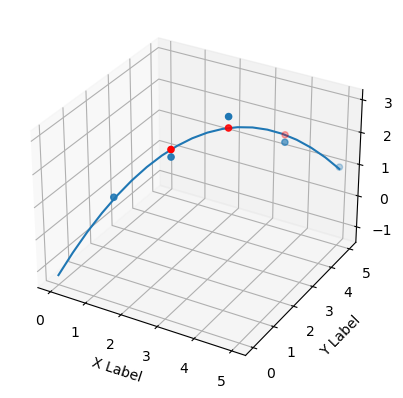

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z)
ax.scatter(indicies, indicies, z_opt, color='red')
ax.plot(x_pred,y_pred,z_pred)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [30]:
# Saddle Example
def saddle(x,y):
    return (x**2) + (y**3)

x = []
y = []
z = []

for i in range(0, 50):
    x_now = random.randint(0,10)
    y_now = random.randint(0,10)
    x.append(x_now)
    y.append(y_now)
    z.append(saddle(x_now, y_now))

x_stack = np.column_stack((x,y))
pol = PolynomialFeatures(degree=2)
x_pol = pol.fit_transform(x_stack)

In [95]:
# Basic Example
# This function comes from our extrema example in linear_algebra
x = np.array([1,2,3,4,5])
y = np.array([1,2,3,4,5])
z = np.array([1,2,3,2,1])


In [96]:
# Regression
model = linear_model.LinearRegression()
model.fit(x_pol, z)
z_pred = model.predict(x_pol)

ValueError: Found input variables with inconsistent numbers of samples: [50, 5]

In [91]:
# Optimizing
# Calculate the gradient
deriv = np.polyder(model.coef_)
z_deriv = np.polyval(deriv, x_stack)

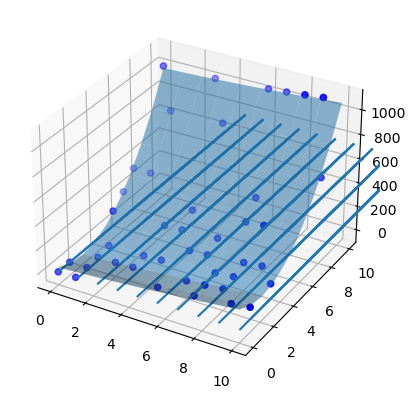

In [94]:
# Plotting
fig = plt.figure()
ax=fig.add_subplot(projection='3d')
ax.scatter(x,y,z, color='blue')

x_range = np.linspace(min(x), max(x), 10)
y_range = np.linspace(min(y), max(y), 10)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)
x_poly_mesh = pol.transform(np.column_stack((x_mesh.flatten(), y_mesh.flatten())))
z_poly_mesh = model.predict(x_poly_mesh).reshape(x_mesh.shape)
ax.plot_surface(x_mesh, y_mesh, z_poly_mesh, alpha=0.5)

# Calculate Gradient
gradient_x = model.coef_[0] * np.ones_like(x_mesh)
gradient_y = model.coef_[1] * np.ones_like(y_mesh)
ax.quiver(x_mesh, y_mesh, np.zeros_like(x_mesh), gradient_x, gradient_y, np.zeros_like(x_mesh))
